# Bank Marketing Analysis

In [12]:
# Data Manipulation Libraries
import os
import pandas as pd
import numpy as np

# Vizualization Libraries
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# ML model Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')


## Section I : Data Loading

### Part I : Load the dataset into the notebook 

In [13]:
df = pd.read_csv('banking1.csv')

In [14]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [15]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [16]:
df['education'].replace(["basic-4y","basic-9y","basic-6y","unknown"], ["basic.4y","basic.9y","basic.6y","university.degree"],inplace=True)

In [17]:
df['education'].value_counts()

university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [20]:
df['job'].value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
STUDENT              2
ADMIN.               2
MANAGEMENT           1
TECHNICIAN           1
BLUE-COLLAR          1
HOUSEMAID            1
UNKNOWN              1
Name: job, dtype: int64

In [21]:
df['job'].replace(["ADMIN.","MANAGEMENT","RETIRED","SERVICES","STUDENT","TECHNICIAN","BLUE-COLLAR","HOUSEMAID","UNKNOWN"], ["admin.","management","retired","services","student","technician","blue-collar","housemaid","admin."],inplace=True)

In [25]:
df['job'].replace(["unknown"], ["admin."],inplace=True)

In [26]:
df['job'].value_counts()

admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [28]:
df['marital'].value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [29]:
df['marital'].replace(["M","D","S","unknown"], ["married","divorced","single","married"],inplace=True)

In [30]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [31]:
df['default'].replace(["unknown"], ["no"],inplace=True)

In [32]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [33]:
df['housing'].replace(["unknown"], ["yes"],inplace=True)

In [34]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [35]:
df['loan'].replace(["unknown"], ["no"],inplace=True)

In [49]:
df['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '25', '57', '63', '58', '60', '64', '51', '23', '20', '74',
       '80', '61', '62', '75', '21', '82', '77', '70', '76', '73', '66',
       '22', '71', '19', '79', '88', '65', '67', '81', '18', '84', '69',
       '98', '85', '83', '78', '92', '86', '94', '17', '91', '89', '87',
       '95', '30-40', 56, 39, 30, 53, 37, 22, 45, 31, 24, 50, 58, 33, 27,
       28, 32, 51, 41, 49, 43, 44, 35, 29, 26, 57, 25, 42, 48, 46, 67, 38,
       34, 54, 40, 23, 47, 62, 75, 55, 36, 52, 59, 78, 70, 60, 20, 66, 61,
       21, 88, 18, 68, 71, 73, 80, 79, 63, 76, 83, 65, 19, 86, 17, 72, 69,
       81, 64, 77, 74, 85, 82], dtype=object)

In [50]:
df['age'].replace(["35-30","30-35","25-30","18-25","30-32","50-55","45-50","20-25","20-40","35-40","30-40"], ["32","32","27","21","31","47","22","30","37","35","35"],inplace=True)

In [51]:
df = df.astype({"age":int})

In [52]:
df.shape

(41188, 21)

### Part II : Explore and make note of Attribute Information from UCI

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.023089,10.421355,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,963.568005,211.772296,0.000,999.000,999.000,999.000,9999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [55]:
df['job'].value_counts()

admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

### Data Dictionoary:

Input variables:

#### Bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')


#### Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


#### Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


#### Social and economic context attributes:
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


#### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


### Part III : What is the significance of the y column in the dataset and what are the value counts of the y column? 
#### Significance of y : y is the target variable which denoted if a client is subscribed a term deposit or not? (Categories : 'yes' or 'no')

In [56]:
# Value count of y

df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

#### Inference: 4640 customers are subscriber and the remaining are not subscribed.

### Part IV : What is the ratio of the two classes ? Are they balanced ? 

In [57]:
df['y'].value_counts() / len(df) * 100

0    88.734583
1    11.265417
Name: y, dtype: float64

#### Inference: 88.7 % of the customers are not subscriber and the remaining 11.2 % are subscribed.

## --------------------------------------------------------------------------------------------------------

## Section II : Data Cleaning

### Part I : Get the dtypes of all the columns of our dataset 

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

### Part II : Refering to the UCI data description , explore the data in your columns and check if there are any errors 

In [59]:
# number of rows in dataset

print("Bank marketing dataset consists of {rows} rows.".format(rows = len(df)))

Bank marketing dataset consists of 41188 rows.


#### Missing Values Analysis

In [60]:
#find percentage of missing values for each column
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

#### Duplicate records Analysis

In [61]:
# generate a table of those culprit rows which are duplicated:
dups = df.groupby(df.columns.tolist()).size().reset_index().rename(columns={0:'count'})

# sum the final col of that table, and subtract the number of culprits:
dups['count'].sum() - dups.shape[0]

14

#### Infrence: We can see that there are 12 duplicate rows, thus we will be dropping them

In [62]:
df.drop_duplicates(keep=False, inplace=True)

In [63]:
# generate a table of those culprit rows which are duplicated:
dups = df.groupby(df.columns.tolist()).size().reset_index().rename(columns={0:'count'})

# sum the final col of that table, and subtract the number of culprits:
dups['count'].sum() - dups.shape[0]

0

#### Inference: We have cleaned the data by dropping duplicates.

In [64]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,no,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,university.degree,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## --------------------------------------------------------------------------------------------------------

## Section III : Exploring data with Group by

Use the groupby function on the mean of the following columns :

I : y

II : job 

III : marital

IV : education

In [65]:
df.groupby(['y']).mean().round(2)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.91,220.90,2.63,985.34,0.13,0.25,93.60,-40.59,3.81,5176.16
1,40.91,553.32,2.05,791.95,0.49,-1.23,93.35,-39.79,2.12,5095.12


In [66]:
df.groupby(['job']).mean().round(2)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.41,253.91,2.62,955.48,0.19,0.03,93.54,-40.20,3.56,5164.41,0.13
blue-collar,39.55,264.60,2.56,987.10,0.12,0.25,93.66,-41.38,3.77,5175.61,0.07
entrepreneur,41.72,263.27,2.54,987.45,0.14,0.16,93.61,-41.28,3.79,5176.31,0.09
housemaid,45.50,250.45,2.64,960.58,0.14,0.43,93.68,-39.50,4.01,5179.53,0.10
management,42.36,257.06,2.48,962.65,0.19,-0.01,93.52,-40.49,3.61,5166.65,0.11
retired,62.05,274.11,2.48,897.70,0.33,-0.70,93.43,-38.58,2.77,5122.26,0.25
self-employed,39.93,264.14,2.66,976.62,0.14,0.09,93.56,-40.49,3.69,5170.67,0.10
services,37.92,258.58,2.59,979.95,0.16,0.18,93.64,-41.29,3.70,5171.61,0.08
student,25.89,283.68,2.10,840.22,0.52,-1.41,93.33,-40.19,1.88,5085.94,0.31


In [67]:
df.groupby(['marital']).mean().round(2)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.90,253.88,2.61,968.63,0.17,0.16,93.61,-40.71,3.72,5170.85,0.10
married,42.30,257.70,2.58,967.85,0.16,0.18,93.60,-40.27,3.74,5171.79,0.10
single,33.15,261.59,2.53,952.21,0.21,-0.17,93.52,-40.92,3.32,5155.21,0.14


In [68]:
df.groupby(['education']).mean().round(2)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic.4y,47.59,264.89,2.60,970.00,0.15,0.22,93.66,-40.24,3.75,5170.11,0.10
basic.6y,40.45,264.54,2.56,980.35,0.13,0.23,93.65,-41.13,3.77,5174.70,0.08
basic.9y,39.06,261.29,2.53,979.13,0.14,0.16,93.62,-41.33,3.70,5172.29,0.08
high.school,38.00,261.01,2.57,964.34,0.19,0.03,93.58,-40.94,3.56,5164.98,0.11
illiterate,48.50,276.78,2.28,943.83,0.11,-0.13,93.32,-39.95,3.52,5171.78,0.22
professional.course,40.09,252.60,2.59,962.44,0.16,0.17,93.57,-40.12,3.71,5170.09,0.11
university.degree,39.45,254.44,2.57,951.94,0.20,-0.02,93.51,-39.97,3.54,5162.79,0.14


## --------------------------------------------------------------------------------------------------------

## Section III : Exploratory Data Analysis

Part I : Create bar graphs to the frequency of purchase with respect to the job , martial etc.

Part II : Also create stacked bars to same data columns with respect to ??

Part III : Explore the age column using a histogram and note down your observations

<AxesSubplot:xlabel='job'>

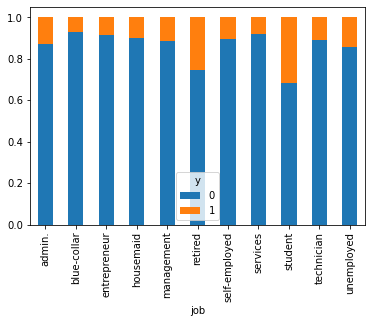

In [72]:
# bar graphs to the frequency of purchase with respect to the job 

job_bar = pd.crosstab(df['job'],df['y'])

job_bar.div(job_bar.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='marital'>

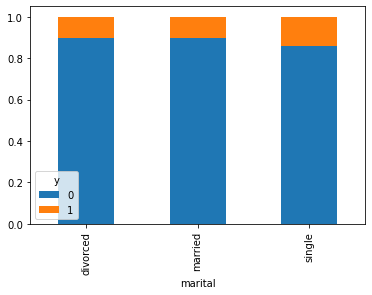

In [73]:
# bar graphs to the frequency of purchase with respect to the martial 

Mar_bar = pd.crosstab(df['marital'],df['y'])

Mar_bar.div(Mar_bar.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

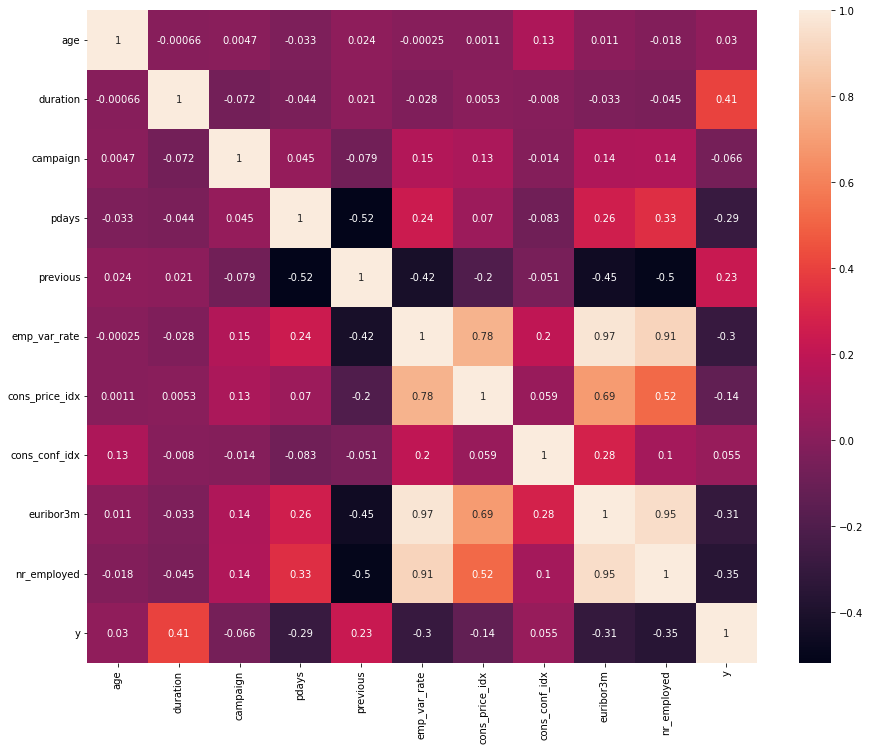

In [74]:
df_corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(df_corr, annot=True)
plt.show()

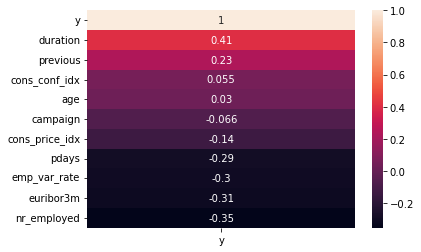

In [75]:
heatmap = sns.heatmap(df_corr[['y']].sort_values(by='y', ascending=False), annot=True)

## --------------------------------------------------------------------------------------------------------

## Section IV : Categorical Variable Encoding

Part I : Create dummy variables for your categorial variables 

part II : Explore your new dataset with these new dummy variables !

In [76]:
# Part I : Create dummy variables for your categorial variables

cat_val = df.columns[df.dtypes == 'object']

for i in cat_val:
  print("The column named : '",i,"' has the following unique values: \n")
  display(list(df[i].unique()))
  print()

The column named : ' job ' has the following unique values: 



['blue-collar',
 'technician',
 'management',
 'services',
 'retired',
 'admin.',
 'housemaid',
 'unemployed',
 'entrepreneur',
 'self-employed',
 'student']


The column named : ' marital ' has the following unique values: 



['married', 'single', 'divorced']


The column named : ' education ' has the following unique values: 



['basic.4y',
 'university.degree',
 'high.school',
 'basic.9y',
 'professional.course',
 'basic.6y',
 'illiterate']


The column named : ' default ' has the following unique values: 



['no', 'yes']


The column named : ' housing ' has the following unique values: 



['yes', 'no']


The column named : ' loan ' has the following unique values: 



['no', 'yes']


The column named : ' contact ' has the following unique values: 



['cellular', 'telephone']


The column named : ' month ' has the following unique values: 



['aug', 'nov', 'jun', 'apr', 'jul', 'may', 'oct', 'mar', 'sep', 'dec']


The column named : ' day_of_week ' has the following unique values: 



['thu', 'fri', 'tue', 'mon', 'wed']


The column named : ' poutcome ' has the following unique values: 



['nonexistent', 'success', 'failure']

In [77]:
# Creating dummies for categorical variables

df_new=pd.get_dummies(df,columns=cat_val)

In [78]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41160 entries, 0 to 41187
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41160 non-null  int64  
 1   duration                       41160 non-null  int64  
 2   campaign                       41160 non-null  int64  
 3   pdays                          41160 non-null  float64
 4   previous                       41160 non-null  int64  
 5   emp_var_rate                   41160 non-null  float64
 6   cons_price_idx                 41160 non-null  float64
 7   cons_conf_idx                  41160 non-null  float64
 8   euribor3m                      41160 non-null  float64
 9   nr_employed                    41160 non-null  float64
 10  y                              41160 non-null  int64  
 11  job_admin.                     41160 non-null  uint8  
 12  job_blue-collar                41160 non-null 

In [79]:
df_new.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,41160.000000,41160.000000,41160.000000,41160.000000,41160.000000,41160.000000,41160.000000,41160.000000,41160.000000,41160.000000,...,41160.000000,41160.000000,41160.000000,41160.000000,41160.000000,41160.000000,41160.000000,41160.000000,41160.000000,41160.000000
mean,40.022133,258.362269,2.568319,963.543902,0.173081,0.081844,93.575762,-40.503540,3.621171,5167.029696,...,0.017396,0.013848,0.190112,0.206706,0.209208,0.196356,0.197619,0.103304,0.863338,0.033358
std,10.420010,259.338877,2.770715,211.842299,0.495049,1.570839,0.578858,4.627556,1.734464,72.253264,...,0.130742,0.116863,0.392394,0.404947,0.406748,0.397245,0.398208,0.304359,0.343494,0.179571
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,98.000000,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## --------------------------------------------------------------------------------------------------------

## Section V : Preliminary Training

Part I : Import your Logisitc Regression libraries

Part II : Split your train and test dataset and train on the data

Part III : Make note of the classification report and other metrics

In [80]:
# Using a copy dataset containing dummies
df_new1 = df_new.copy()
x = df_new1.drop(columns=['y'])
y = df_new1['y']

# using Standard Scalar
ssc = StandardScaler(with_mean=True,with_std=True)
ssc.fit_transform(x)

array([[ 0.38175732, -0.18648518, -0.56604088, ..., -0.33941917,
         0.39786259, -0.18576533],
       [ 1.24549057, -0.46411758, -0.56604088, ..., -0.33941917,
         0.39786259, -0.18576533],
       [-1.15376846,  0.31093954,  0.1558033 , ..., -0.33941917,
        -2.51343059,  5.38313571],
       ...,
       [ 0.1898166 , -0.757174  ,  0.1558033 , ..., -0.33941917,
         0.39786259, -0.18576533],
       [ 0.76563876, -0.22504523, -0.20511879, ..., -0.33941917,
         0.39786259, -0.18576533],
       [-1.44167954, -0.56437372,  0.51672538, ..., -0.33941917,
         0.39786259, -0.18576533]])

In [81]:
# Splitting into training and testing dataset

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [82]:
# Running Logistic Regression

log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)

print('Accuracy Score : %f' % (accuracy_score(y_pred, y_test)))

Accuracy Score : 0.914359


In [83]:
#Check precision, recall, f1-score & Accuracy

print( classification_report(y_test, y_pred) )

from sklearn.metrics import plot_confusion_matrix

print( "The accuracy of the Model",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7332
           1       0.68      0.42      0.51       900

    accuracy                           0.91      8232
   macro avg       0.80      0.70      0.73      8232
weighted avg       0.90      0.91      0.91      8232

The accuracy of the Model 0.9143586005830904


## --------------------------------------------------------------------------------------------------------

## Section VI : Let's Improve the performance !

Part 0 : What was your answer to Section - Part IV? Do you think class imbalance affects the model performance? Explore SMOTE implementation

Part I : Make note of the performance from the last training 

Part II : Try implementing SMOTE to balance the two class labels 

Part III : Make note of the y label data now , what are the rations now ?

In [84]:
# pip install imblearn

In [85]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

sm = SMOTE()
x_sm,y_sm = sm.fit_resample(x,y)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=0)

In [87]:
# Running Logistic Regression

log = LogisticRegression()
log.fit(X_train,y_train)
y_pred = log.predict(X_test)

print('Accuracy Score : %f' % (accuracy_score(y_pred, y_test)))

#Check precision, recall, f1-score
print( classification_report(y_test, y_pred))

print( "The accuracy of the Model",accuracy_score(y_test, y_pred))

Accuracy Score : 0.876446
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      7292
           1       0.87      0.89      0.88      7317

    accuracy                           0.88     14609
   macro avg       0.88      0.88      0.88     14609
weighted avg       0.88      0.88      0.88     14609

The accuracy of the Model 0.8764460264220686


## Section VII : Let us Re-Train!

Part I : Explore what RFE means

Part II : Implement your training process inside the RFE 

Part III : What are the best columns that your RFE found? Please make a list of it

In [88]:
# implementing RFE
from sklearn.feature_selection import RFE

rfe = RFE(log, n_features_to_select= 30)
rfe = rfe.fit(X_train, y_train)

In [89]:
rfe.ranking_

array([17, 21, 15, 24, 16, 18, 12, 22, 11, 19,  7,  1,  2,  5,  4, 27,  6,
        1,  9,  3,  8,  1,  1,  1,  1,  1,  1,  1, 26,  1,  1, 20, 28,  1,
        1,  1,  1,  1,  1,  1,  1, 25,  1,  1, 13,  1,  1, 23, 10,  1,  1,
        1,  1,  1,  1,  1, 14])

## Section VIII : Training time !

Part I : Now train the model with the new data you have created after the RFE 

Part II : Create the prediction system to get the metrics such as accuracy

In [90]:
# predicting using RFE

predictions = rfe.predict(X_test)

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

print( "The accuracy of the Model",accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7292
           1       0.98      0.90      0.94      7317

    accuracy                           0.94     14609
   macro avg       0.94      0.94      0.94     14609
weighted avg       0.94      0.94      0.94     14609

The accuracy of the Model 0.9410637278390034


## Extra - Using RandamizedSearchCV hyper-optimization

In [91]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100))
}

In [92]:
log = RandomizedSearchCV(estimator = LogisticRegression(),
                           param_distributions = param_grid, 
                           scoring = 'accuracy', 
                           cv = 10,
                           n_jobs=-1
                           )

log.fit(X_train,y_train)

/Users/techi.s./opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/techi.s./opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/techi.s./opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/techi.s./opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/techi.s./opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/techi.s./opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/techi.s./opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/techi.s./opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/techi.s./opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/techi.s./opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600, 700],
                                        'penalty': ['l1', 'l2']},
                   scoring='accuracy')

In [93]:
log.best_score_

0.9431677666918171